In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.linear_model import LinearRegression

In [37]:
x = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5])
y = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5])

Text(0, 0.5, 'y axis')

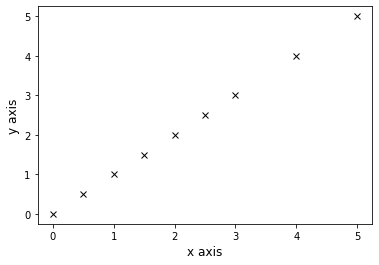

In [38]:
# Plot training set
fig = plt.figure(1) 
plt.plot(x, y, 'x', markersize=6, color = 'black')
plt.xlabel('x axis',fontsize=12)
plt.ylabel('y axis',fontsize=12)

### The coefficients of the simple linear regression

In [39]:
reg = LinearRegression().fit(x[:,np.newaxis], y)
print("Regression coefficient: ", round(reg.coef_[0], 3))
print("Regression intercept: ", round(reg.intercept_, 3))

Regression coefficient:  1.0
Regression intercept:  -0.0


Text(0, 0.5, 'y axis')

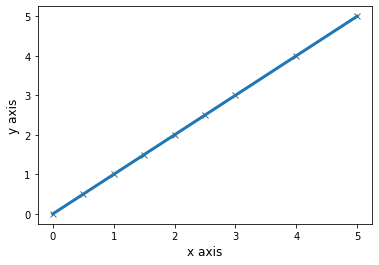

In [40]:
# Plot training set
fig1 = plt.figure(1) 
plt.plot(x, y, 'x', markersize=6, alpha = 0.6, color = 'black')
plt.plot(x, reg.intercept_ + reg.coef_*x, linewidth = 3)
plt.xlabel('x axis', fontsize=12)
plt.ylabel('y axis', fontsize=12)

## Construct the J cost function 

In [42]:
theta0 = np.arange(-2, 2.01, 0.25)
theta1 = np.arange(-2, 3.01, 0.25)

J = np.empty([len(theta1), len(theta0)])
for i in range(0, len(theta0)):  
    for j in range(0, len(theta1)):
        b = theta0[i]
        w = theta1[j]
        J[j][i] = 0
        for n in range(len(y)):
            J[j][i] = J[j][i] + (b + w*x[n] - y[n])**2
        J[j][i] = J[j][i]/(2*len(y))
        
theta0_axis, theta1_axis = np.meshgrid(theta0, theta1)

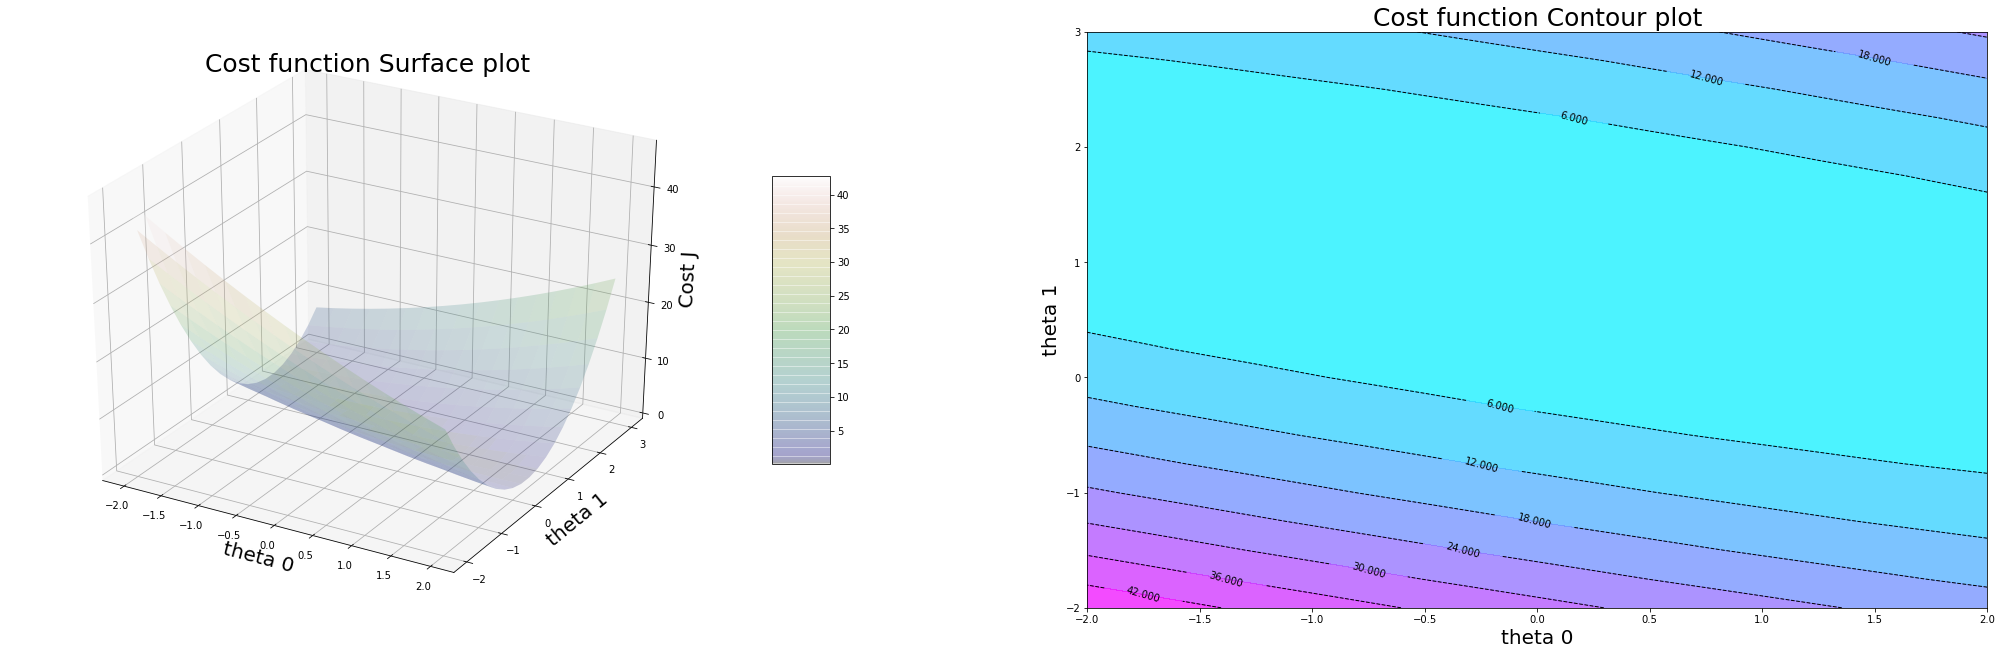

In [43]:
fig2 = plt.figure(2, figsize=(20, 10))
ax = fig2.add_subplot(121, projection="3d")
mycmap = plt.get_cmap('gist_earth')
surf = ax.plot_surface(theta0_axis, theta1_axis, J, rstride=1, cstride=1, color='b', alpha=0.2, cmap=mycmap)
ax.set_xlabel('theta 0', size = 20)
ax.set_ylabel('theta 1', size = 20)
ax.set_zlabel('Cost J', size = 20)
ax.set_title('Cost function Surface plot', size = 25)
fig2.colorbar(surf, ax = ax, shrink=0.5, aspect=5)

ax = fig2.add_subplot(122)
cp = ax.contour(theta0_axis, theta1_axis, J, linewidths=1, colors='black', linestyles='dashed')
plt.contourf(theta0_axis, theta1_axis, J, alpha = 0.75, cmap = plt.cm.cool)
plt.clabel(cp, inline = True, fontsize = 10)
ax.set_xlabel('theta 0', size = 20)
ax.set_ylabel('theta 1', size = 20)
ax.set_title('Cost function Contour plot', size = 25)

fig2.subplots_adjust(bottom=0.1, right=1.5, top=0.9)

## Gradient Descent: GD, Adagrad, Adam

In [51]:
def gradientDescent(x, y, theta0, theta1, alpha, maxsteps, mode = 'SGD'):
    # recording the path from the initail guess
    theta0Hist = [theta0]
    theta1Hist = [theta1]
    costHist = []
    firstP = True
    
    # for Adagrad
    grad0Sum = 0
    grad1Sum = 0
    
    # for Adam
    m0 = 0
    v0 = 0
    m1 = 0
    v1 = 0
    beta_1 = 0.9
    beta_2 = 0.999
    epsilon = 1*10**-8
    
    for i in range(0, maxsteps):
        theta0_grad = 0
        theta1_grad = 0
        for j in range(0, len(y)):
            theta0_grad = theta0_grad + (theta0 + theta1*x[j] - y[j])
            theta1_grad = theta1_grad + (theta0 + theta1*x[j] - y[j])*x[j]
        theta0_grad = theta0_grad/len(y)
        theta1_grad = theta1_grad/len(y)
        
        grad0Sum = grad0Sum + theta0_grad**2
        grad1Sum = grad1Sum + theta1_grad**2
        
        # Now, we refresh the theta0 and theta1 simultaneously
        if mode == 'GD':
            theta0 = theta0 - alpha*theta0_grad
            theta1 = theta1 - alpha*theta1_grad
        elif mode == 'Adagrad':
            theta0 = theta0 - alpha/np.sqrt(grad0Sum) * theta0_grad
            theta1 = theta1 - alpha/np.sqrt(grad0Sum) * theta1_grad
        elif mode == 'Adam':
            m0 = beta_1 * m0 + (1 - beta_1) * theta0_grad
            v0 = beta_2 * v0 + (1 - beta_2) * grad0Sum
            if i != 0:
                m0_hat = m0 / (1 - np.power(beta_1, i))
                v0_hat = v0 / (1 - np.power(beta_2, i))
            else:
                m0_hat = m0
                v0_hat = v0
            theta0 = theta0 - alpha * m0_hat / (np.sqrt(v0_hat) + epsilon)
        
            m1 = beta_1 * m1 + (1 - beta_1) * theta1_grad
            v1 = beta_2 * v1 + (1 - beta_2) * grad1Sum
            if i != 0:
                m1_hat = m1 / (1 - np.power(beta_1, i))
                v1_hat = v1 / (1 - np.power(beta_2, i))
            else:
                m1_hat = m1
                v1_hat = v1
            theta1 = theta1 - alpha * m1_hat / (np.sqrt(v1_hat) + epsilon)
        # calculate everystep's cost
        cost = 0
        for n in range(len(y)):
            cost = cost + (theta0 + theta1*x[n] - y[n])**2
        cost = cost/(2*len(y))
        
        # Restore the theta to see the improvement process
        theta0Hist.append(theta0)
        theta1Hist.append(theta1)
        costHist.append(cost)
        
        # To record the first step of convergence on parameters 
        if np.abs(theta0 - reg.intercept_) < 0.05 and np.abs(theta1 - reg.coef_[0]) < 0.05 and firstP == True: 
            print("The Close Step: ", i)
            firstP = False
        
         
    return theta0, theta1, theta0Hist, theta1Hist, costHist

## The wrong gradient descent (parameters not refresh simultaneously)

In [52]:
def gradientDescentWrong(x, y, theta0, theta1, alpha, maxsteps):
    # only try SGD
    # recording the path from the initail guess
    theta0Hist = [theta0]
    theta1Hist = [theta1]
    costHist = []
    firstP = True
    
    for i in range(0, maxsteps):
        theta0_grad = 0
        theta1_grad = 0
        if i%2 == 0:
        # Refresh the theta0 first and then theta1 second. 
            for j in range(0, len(y)):
                theta0_grad = theta0_grad + (theta0 + theta1*x[j] - y[j])
            theta0_grad = theta0_grad/len(y)
            
        else:
            for j in range(0, len(y)):
                theta1_grad = theta0_grad + (theta0 + theta1*x[j] - y[j])*x[j]
            theta1_grad = theta1_grad/len(y)
            
        theta0 = theta0 - alpha*theta0_grad
        theta1 = theta1 - alpha*theta1_grad
        
        # calculate everystep's cost
        cost = 0
        for n in range(len(y)):
            cost = cost + (theta0 + theta1*x[n] - y[n])**2
        cost = cost/(2*len(y))
        
        # Restore the theta to see the improvement process
        theta0Hist.append(theta0)
        theta1Hist.append(theta1)
        costHist.append(cost)
        
        # To record the first step of convergence on parameters 
        if np.abs(theta0 - reg.intercept_) < 0.05 and np.abs(theta1 - reg.coef_[0]) < 0.05 and firstP == True: 
            print("The Close Step: ", i)
            firstP = False
        
         
    return theta0, theta1, theta0Hist, theta1Hist, costHist

## Plot

In [53]:
def cost_plot(theta0Hist, theta1Hist, costHist):
    fig3 = plt.figure(2, figsize=(20, 10))
    ax = fig3.add_subplot(121)
    plt.plot(np.arange(len(costHist)), costHist, color = 'green', linewidth = 7)
    ax.set_xlabel('Iteration times', size = 20)
    ax.set_ylabel('Cost', size = 20)
    ax.set_title('Cost Plot by Iteration', size = 25)

    ax = fig3.add_subplot(122)
    cp = ax.contour(theta0_axis, theta1_axis, J, linewidths=1, colors='black', linestyles='dashed')
    plt.contourf(theta0_axis, theta1_axis, J, alpha = 0.75, cmap = plt.cm.cool)
    plt.clabel(cp, inline = True, fontsize = 10)
    plt.plot(theta0Hist, theta1Hist, 'x', color = 'green')
    plt.plot(reg.intercept_, reg.coef_[0], 'D', color = 'black', markersize = 12)
    ax.set_xlabel('theta 0', size = 20)
    ax.set_ylabel('theta 1', size = 20)
    ax.set_title('Cost function Contour plot', size = 25)

    fig3.subplots_adjust(bottom=0.1, right=1.5, top=0.9)

The Close Step:  1349
Optimizer mode:  GD
Estimated theta0: 0.000 and Optimal theta0: -0.000
Estimated theta1: 1.000 and Optimal theta1: 1.000


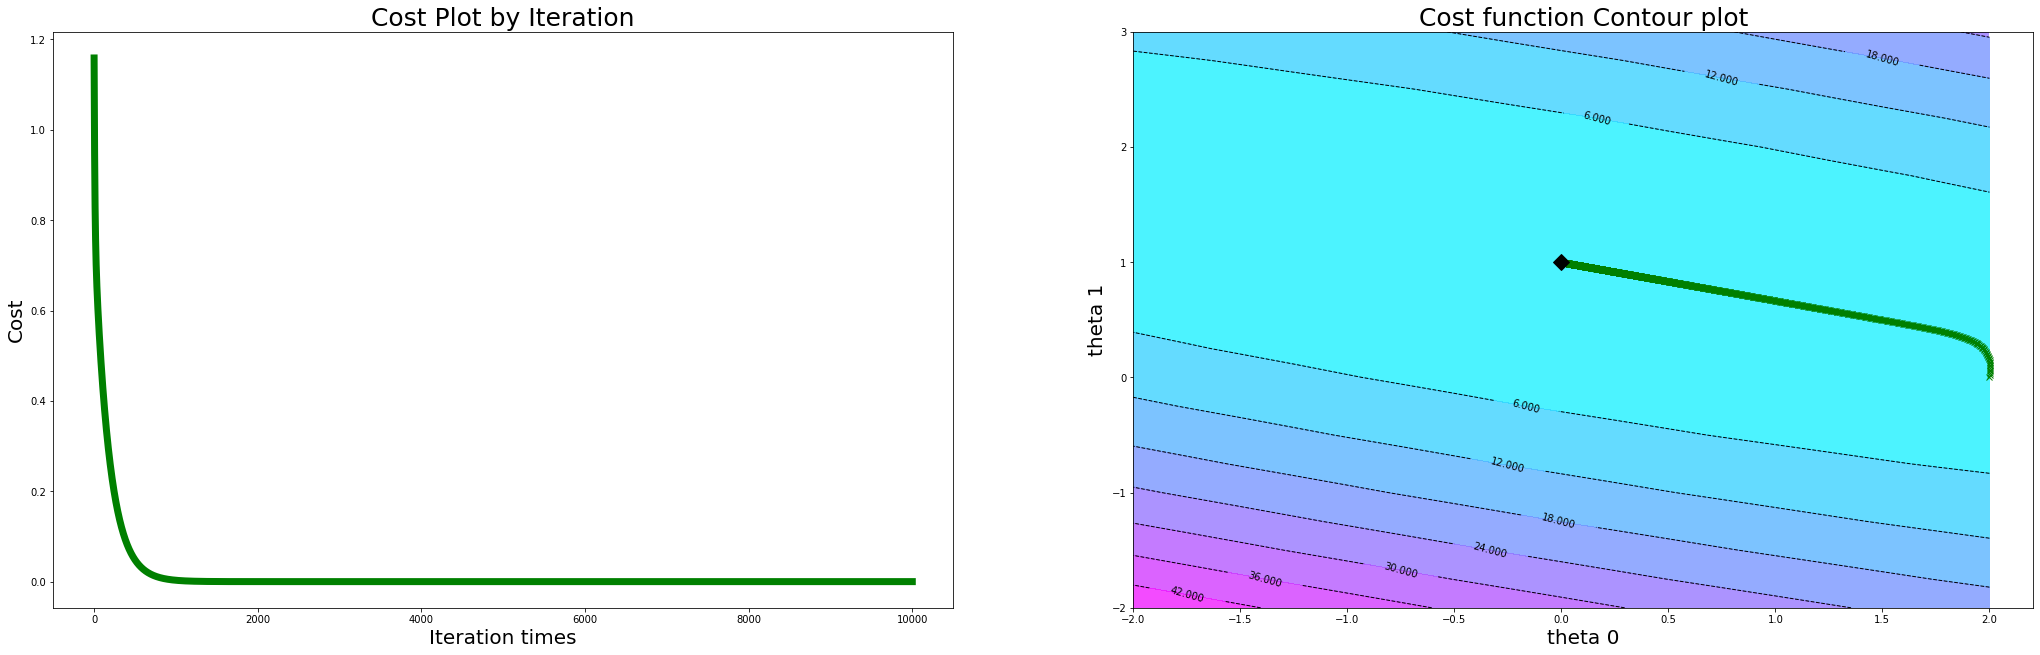

In [54]:
if __name__ == "__main__":
    # parameter setting
    init_theta0 = 2
    init_theta1 = 0
    initAlpha = 0.01
    max_step = 10000
    Mode = 'GD'
    # function running
    theta_0, theta_1, theta0Hist, theta1Hist, costHist = gradientDescent(x, y, init_theta0, init_theta1, initAlpha, max_step, mode = Mode)
    #theta_0, theta_1, theta0Hist, theta1Hist, costHist = gradientDescentWrong(x, y, init_theta0, init_theta1, initAlpha, max_step)
    print("Optimizer mode: ", Mode)
    print("Estimated theta0: %0.3f and Optimal theta0: %0.3f" %(theta_0, reg.intercept_))
    print("Estimated theta1: %0.3f and Optimal theta1: %0.3f" %(theta_1, reg.coef_[0]))
    cost_plot(theta0Hist, theta1Hist, costHist)